# Importowanie niezbędnych bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Wczytanie danych, ustawienie rozmiaru obrazów na 64×64 i wyświetlenie przykładowych obrazów

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

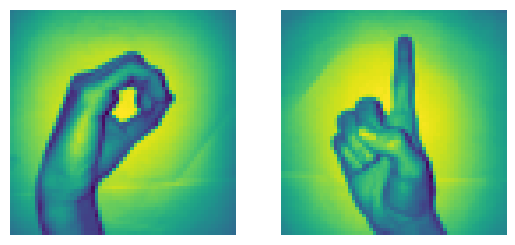

In [2]:
x_l = np.load('X.npy')
y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

# Połączenie wybranych zakresów obrazów w tablicę X, stworzenie wektora etykiet Y odpowiadającym klasom i wyświetlenie rozmiarów tablic

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


# Podzielenie danych na zestawy treningowy i testowy (15% test), spłaszczenie obrazów z wymiaru 64×64 do wektorów długości 4096 i wyświetlenie nowych rozmiarów tablic.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])
print('X_train flatten:', X_train_flatten.shape)
print('X_test flatten:', X_test_flatten.shape)

X_train flatten: (348, 4096)
X_test flatten: (62, 4096)


# Transpozycja spłaszczonych danych, by kolumny odpowiadały próbom, i wyświetlenie rozmiarów tablic

In [5]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (4096, 348)
x_test shape: (4096, 62)
y_train shape: (1, 348)
y_test shape: (1, 62)


# Funkcja inicjalizującą parametry oraz wymiary warstw

In [6]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {
        'weight1': np.random.randn(3, x_train.shape[0]) * 0.1,
        'bias1': np.zeros((3, 1)),
        'weight2': np.random.randn(y_train.shape[0], 3) * 0.1,
        'bias2': np.zeros((y_train.shape[0], 1))
    }
    return parameters

# Funkcja sigmoidalna służąca jako funkcja aktywacji w regresji logistycznej

In [7]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# Funkcja propagacji do przodu

In [8]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters['weight1'], x_train) + parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'], A1) + parameters['bias2']
    A2 = sigmoid(Z2)
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2,
    }
    return A2, cache

# Funkcja obliczająca średni koszt

In [9]:
def compute_cost(A2, Y):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

# Funkcja propagacji wstecznej

In [10]:
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache['A2'] - Y
    dW2 = np.dot(dZ2, cache['A1'].T) / X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[1]
    dZ1 = np.dot(parameters['weight2'].T, dZ2) * (1 - np.power(cache['A1'], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims=True) / X.shape[1]
    grads = {
        'dweight1': dW1,
        'dbias1': db1,
        'dweight2': dW2,
        'dbias2': db2,
    }
    return grads

# Aktualizacja parametrów

In [11]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {
        'weight1': parameters['weight1'] - learning_rate * grads['dweight1'],
        'bias1': parameters['bias1'] - learning_rate * grads['dbias1'],
        'weight2': parameters['weight2'] - learning_rate * grads['dweight2'],
        'bias2': parameters['bias2'] - learning_rate * grads['dbias2'],
    }
    return parameters

# Obliczenie przewidywań

In [12]:
def predict_NN(parameters, x_test):
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    return Y_prediction

# Tworzenie modelu

In [13]:
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation_NN(x_train, parameters)
        cost = compute_cost(A2, y_train)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print(f'Cost after iteration {i}: {cost}')
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel('Number of Iteration')
    plt.ylabel('Cost')
    plt.show()
    
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)
    
    print(f'train accuracy: {100 - np.mean(np.abs(y_prediction_train - y_train)) * 100} %')
    print(f'test accuracy: {100 - np.mean(np.abs(y_prediction_test - y_test)) * 100} %')
    return parameters

# Inicjalizacja modelu

Cost after iteration 0: 0.29017925102925535
Cost after iteration 100: 0.31032873277995604
Cost after iteration 200: 0.2914865356470525
Cost after iteration 300: 0.25678498080638884
Cost after iteration 400: 0.2206635202135113
Cost after iteration 500: 0.18978987442078465
Cost after iteration 600: 0.1648921856452772
Cost after iteration 700: 0.13929228962289986
Cost after iteration 800: 0.12960983041456256
Cost after iteration 900: 0.11628356717263132
Cost after iteration 1000: 0.10564857311100795
Cost after iteration 1100: 0.09685638971677374
Cost after iteration 1200: 0.08922908684779668
Cost after iteration 1300: 0.08219403681901548
Cost after iteration 1400: 0.07545701578616021
Cost after iteration 1500: 0.06902194837466749
Cost after iteration 1600: 0.06295391972711102
Cost after iteration 1700: 0.05736547438902048
Cost after iteration 1800: 0.052422718445539106
Cost after iteration 1900: 0.04817614557963335
Cost after iteration 2000: 0.04459065377808316
Cost after iteration 2100: 

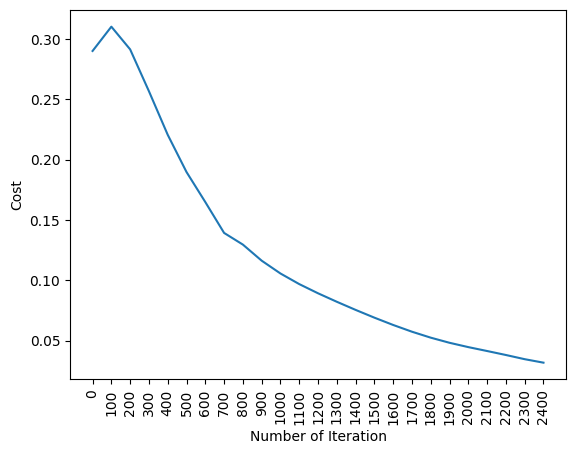

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [14]:
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2500)